In [2]:
import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam





In [3]:
images_fp = './images'

In [4]:
image_names = [os.path.basename(file) for file in glob.glob(os.path.join(images_fp,'*.jpg'))]

In [5]:
image_names

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [6]:
print(f"Total images found: {len(image_names)}")

Total images found: 7390


In [7]:
labels = [' '.join(name.split('_')[:-1:]) for name in image_names]

In [8]:
def label_encode(label):
    if label =='Abyssinian': return 0
    elif label == 'Bengal' : return 1
    elif label == 'Birman' : return 2
    elif label == 'Bombay' : return 3
    elif label == 'British Shorthair' : return 4
    elif label == 'Egyptin Mau' : return 5
    elif label == 'american bulldog' : return 6
    elif label == 'american pit bull terrier' : return 7
    elif label == 'basset hound' : return 8
    elif label == 'beagle' : return 9
    elif label == 'boxer' : return 10
    elif label == 'chihuahua' : return 11
    elif label == 'english cocker spaniel' : return 12
    elif label == 'english setter' : return 13
    elif label == 'german shorthaired' : return 14
    elif label == 'great pyrenees' : return 15
    else: return None

In [9]:
# Initialize lists to store features and labels
features = []
labels = []
IMAGE_SIZE = (224,224)

# Process each image and its label
for name in image_names:
    label = ' '.join(name.split('_')[:-1:])
    label_encoded = label_encode(label)
    if label_encoded != None:
        img = load_img(os.path.join(images_fp, name))
        img = tf.image.resize_with_pad(img_to_array(img, dtype = 'uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        features.append(img)
        labels.append(label_encoded)

In [10]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [11]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [12]:
features_array = np.array(features)
labels_array = np.array(labels)

In [13]:
labels_one_hot = pd.get_dummies(labels_array)

In [14]:
labels_one_hot

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [15]:
# Check the number of unique classes
unique_labels = np.unique(labels_array)
num_classes = len(unique_labels)
print(f"Number of unique classes: {num_classes}")

Number of unique classes: 15


In [16]:
#train = 60% + val = 20% and Test = 20%
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size=0.2, random_state= 42)

In [17]:
#80%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [18]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])
prediction_layers = Dense(num_classes, activation = 'softmax')

In [19]:
resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')
resnet_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 62s 1us/step


In [20]:
# build model
inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = pp_i(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [21]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics = ['accuracy'])

In [23]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_val), X_val.shape)
print(type(y_val), y_val.shape)

<class 'numpy.ndarray'> (1800, 224, 224, 3)
<class 'pandas.core.frame.DataFrame'> (1800, 15)
<class 'numpy.ndarray'> (600, 224, 224, 3)
<class 'pandas.core.frame.DataFrame'> (600, 15)


In [24]:
# Train the model
model_history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.3059 - loss: 2.3996 - val_accuracy: 0.8133 - val_loss: 0.5999
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.7516 - loss: 0.8187 - val_accuracy: 0.8883 - val_loss: 0.3704
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.7880 - loss: 0.6349 - val_accuracy: 0.9150 - val_loss: 0.2873
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.8373 - loss: 0.5011 - val_accuracy: 0.9233 - val_loss: 0.2771
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.8429 - loss: 0.4865 - val_accuracy: 0.9250 - val_loss: 0.2619
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.8740 - loss: 0.3939 - val_accuracy: 0.9283 - val_loss: 0.2474
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.8686 - loss: 0.3696 - val_accuracy: 0.9217 - val_loss: 0.2383
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.8818 - loss: 0.3611 - val_accuracy: 0.9267 - v

In [25]:
# Plot the training and validation accuracy
acc=model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

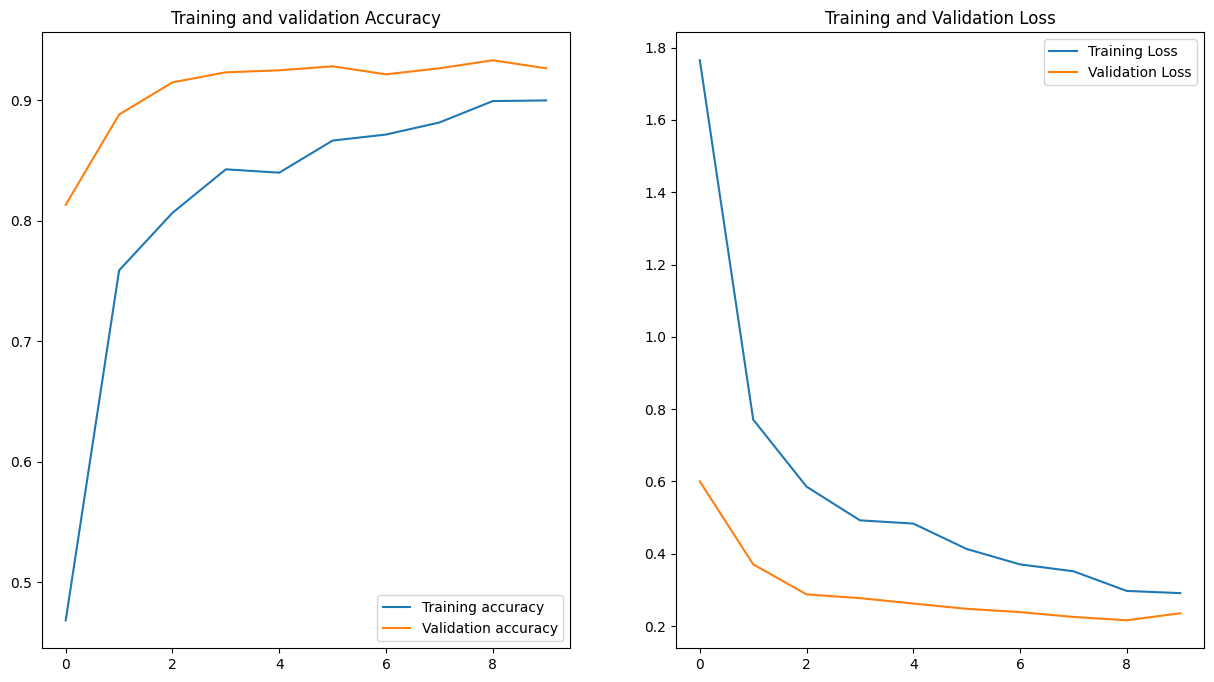

In [33]:
epochs_range=range(10)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc, label="Training accuracy")
plt.plot(epochs_range,val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation Accuracy")

plt.subplot(1,2,2) 
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

In [27]:
plt.show()


In [28]:
model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9189 - loss: 0.2658


[0.24828647077083588, 0.9183333516120911]

In [29]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9189 - loss: 0.2658
Test accuracy: 0.9183333516120911


In [30]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step


In [31]:
y_pred

array([[2.3257310e-02, 1.6101424e-04, 3.3398030e-06, ..., 2.4344774e-07,
        1.5144578e-04, 2.8123268e-06],
       [1.3008942e-03, 9.9517596e-01, 2.8732454e-06, ..., 1.5515050e-04,
        5.6114888e-05, 7.2750836e-06],
       [7.0942951e-06, 5.2840466e-08, 1.8032337e-07, ..., 1.1203056e-09,
        1.6411538e-07, 5.8526343e-08],
       ...,
       [7.2218878e-03, 1.0920098e-03, 3.1843323e-05, ..., 3.3769265e-04,
        1.4518315e-01, 3.4245045e-06],
       [8.0464446e-07, 1.3258340e-06, 4.2049571e-08, ..., 1.7249473e-08,
        2.9110490e-05, 1.8955070e-08],
       [2.2709959e-04, 4.5746451e-04, 9.5870399e-01, ..., 3.0111654e-05,
        4.6715874e-07, 3.2359313e-02]], dtype=float32)